In [148]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [149]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [150]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [152]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [153]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [155]:
train_df[['Pclass', 'Survived']].groupby(
    ['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [156]:
train_df[["Sex", "Survived"]].groupby(
    ['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [157]:
train_df[["SibSp", "Survived"]].groupby(
    ['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [158]:
train_df[["Parch", "Survived"]].groupby(
    ['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


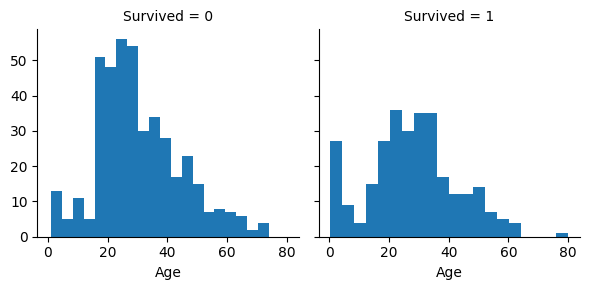

In [159]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


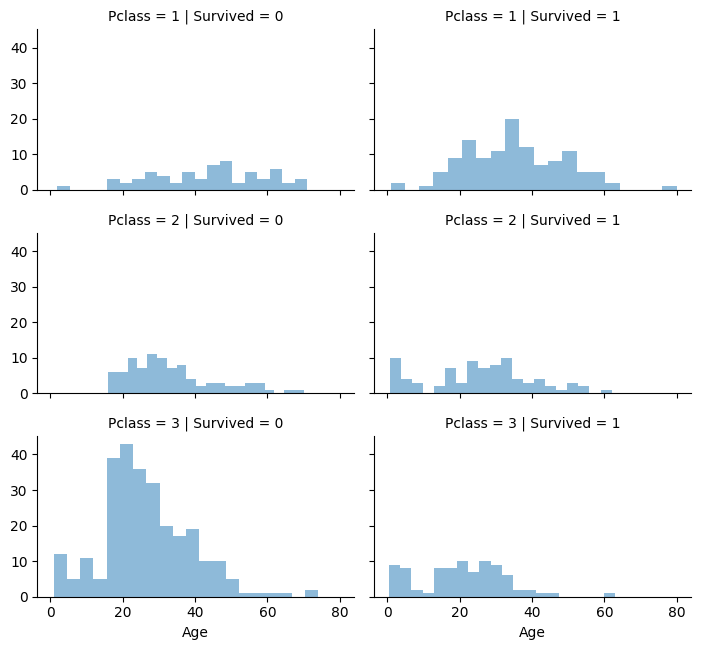

In [160]:
grid = sns.FacetGrid(train_df, col='Survived',
                     row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


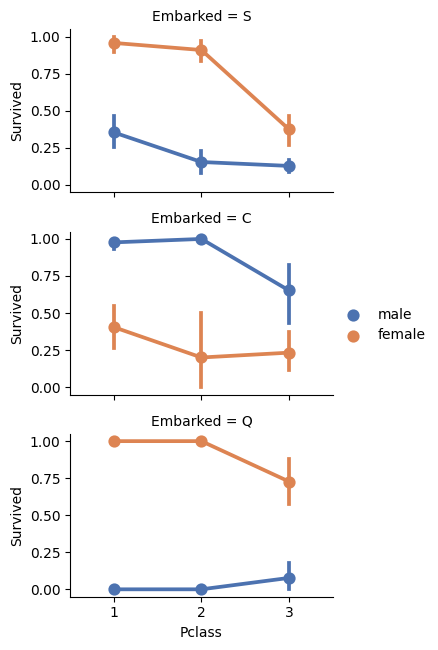

In [161]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


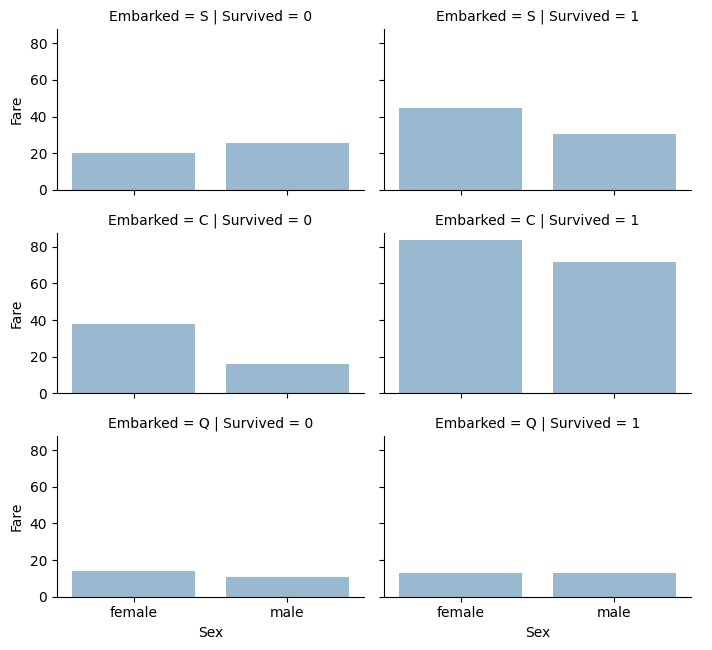

In [162]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked',
                     col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [163]:
print("Before", train_df.shape, test_df.shape,
      combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [164]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [165]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [166]:

# replace title with number
#if title is mr or mrs replace with married
 
#if title is miss replace with 2
#if title is master replace with 3
#if title is rare replace with 4
train_df['Title'] = train_df['Title'].replace(['Mr','Mrs'], 'Married')
train_df['Title'] = train_df['Title'].replace(['Miss', 'Master'], 'Single')
train_df['Title'] = train_df['Title'].replace(['Rare'], 'Rare')
title_mapping = {'Married': 1, 'Single': 2, 'Rare': 3}

train_df['Title'] = train_df['Title'].map(title_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [167]:
test_df['Title'] = test_df['Title'].replace(['Mr','Mrs'], 'Married')
test_df['Title'] = test_df['Title'].replace(['Miss', 'Master'], 'Single')
test_df['Title'] = test_df['Title'].replace(['Rare'], 'Rare')
title_mapping = {'Married': 1, 'Single': 2, 'Rare': 3}

test_df['Title'] = test_df['Title'].map(title_mapping)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1


In [168]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [169]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,1


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


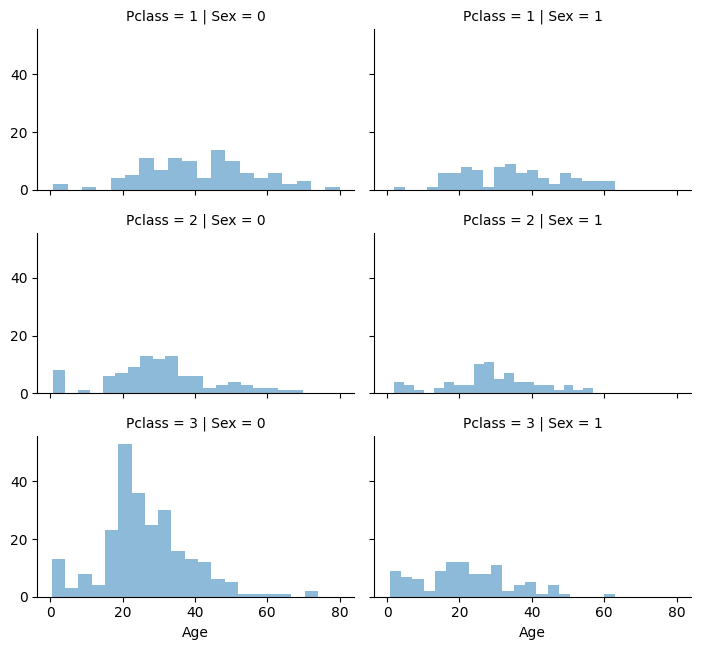

In [170]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [171]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [172]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) &
                               (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                        'Age'] = guess_ages[i, j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,1
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,1
4,0,3,0,35,0,0,8.0500,S,1


In [173]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 10) # try different bands
train_df[['AgeBand', 'Survived']].groupby(
    ['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 8.0]",0.666667
1,"(8.0, 16.0]",0.413043
2,"(16.0, 24.0]",0.400000
3,"(24.0, 32.0]",0.287273
4,"(32.0, 40.0]",0.439189
5,"(40.0, 48.0]",0.352941
6,"(48.0, 56.0]",0.466667
7,"(56.0, 64.0]",0.375000
8,"(64.0, 72.0]",0.000000
9,"(72.0, 80.0]",0.500000


In [174]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 6.0, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 6.0) & (dataset['Age'] <= 13.0), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 13.0) & (dataset['Age'] <= 20.0), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 20.0) & (dataset['Age'] <= 26.0), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 26.0) & (dataset['Age'] <= 33.0), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33.0) & (dataset['Age'] <= 39.0), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 39.0) & (dataset['Age'] <= 46.0), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 46.0) & (dataset['Age'] <= 53.0), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 53.0) & (dataset['Age'] <= 60.0), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 60.0) & (dataset['Age'] <= 66.0), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 66.0) & (dataset['Age'] <= 73) , 'Age' ] = 10
    dataset.loc[dataset['Age'] > 73, 'Age'] = 11
dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,3,1,0,7.2500,S,1,"(16.0, 24.0]"
1,1,1,1,5,1,0,71.2833,C,1,"(32.0, 40.0]"
2,1,3,1,3,0,0,7.9250,S,2,"(24.0, 32.0]"
3,1,1,1,5,1,0,53.1000,S,1,"(32.0, 40.0]"
4,0,3,0,5,0,0,8.0500,S,1,"(32.0, 40.0]"


In [175]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,3,1,0,7.2500,S,1
1,1,1,1,5,1,0,71.2833,C,1
2,1,3,1,3,0,0,7.9250,S,2
3,1,1,1,5,1,0,53.1000,S,1
4,0,3,0,5,0,0,8.0500,S,1


In [176]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(
    ['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [177]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [178]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,3,7.2500,S,1,0
1,1,1,1,5,71.2833,C,1,0
2,1,3,1,3,7.9250,S,2,1
3,1,1,1,5,53.1000,S,1,0
4,0,3,0,5,8.0500,S,1,1


In [179]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,9,3,3
1,5,5,1
2,9,3,3
3,5,5,1
4,15,5,3
5,9,3,3
6,8,8,1
7,0,0,3
8,12,4,3
9,4,2,2


In [180]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [181]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(
    ['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [182]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(
        {'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,3,7.2500,0,1,0,9
1,1,1,1,5,71.2833,1,1,0,5
2,1,3,1,3,7.9250,0,2,1,9
3,1,1,1,5,53.1000,0,1,0,5
4,0,3,0,5,8.0500,0,1,1,15


In [183]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,5,7.8292,2,1,1,15
1,893,3,1,7,7.0000,0,1,0,21
2,894,2,0,9,9.6875,2,1,1,18
3,895,3,0,4,8.6625,0,1,1,12
4,896,3,1,3,12.2875,0,1,0,9


In [184]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 10)
train_df[['FareBand', 'Survived']].groupby(
    ['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.55]",0.141304
1,"(7.55, 7.854]",0.298851
2,"(7.854, 8.05]",0.179245
3,"(8.05, 10.5]",0.230769
4,"(10.5, 14.454]",0.428571
5,"(14.454, 21.679]",0.420455
6,"(21.679, 27.0]",0.516854
7,"(27.0, 39.688]",0.373626
8,"(39.688, 77.958]",0.528090
9,"(77.958, 512.329]",0.758621


In [185]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.55, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.55) & (dataset['Fare'] <= 7.854), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 8.05), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 10.5), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 14.454), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 21.679), 'Fare'] = 5
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 27.0), 'Fare'] = 6
    dataset.loc[(dataset['Fare'] > 27.0) & (dataset['Fare'] <= 39.688), 'Fare'] = 7
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 77.958), 'Fare'] = 8
    dataset.loc[dataset['Fare'] > 77.958, 'Fare'] = 9
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,3,0,0,1,0,9
1,1,1,1,5,8,1,1,0,5
2,1,3,1,3,2,0,2,1,9
3,1,1,1,5,8,0,1,0,5
4,0,3,0,5,2,0,1,1,15
5,0,3,0,3,3,2,1,1,9
6,0,1,0,8,8,0,1,1,8
7,0,3,0,0,5,0,2,0,0
8,1,3,1,4,4,0,1,0,12
9,1,2,1,2,7,1,1,0,4


In [186]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,5,1,2,1,1,15
1,893,3,1,7,0,0,1,0,21
2,894,2,0,9,3,2,1,1,18
3,895,3,0,4,3,0,1,1,12
4,896,3,1,3,4,0,1,0,9
5,897,3,0,2,3,0,1,1,6
6,898,3,1,4,1,2,2,1,12
7,899,2,0,3,7,0,1,0,6
8,900,3,1,2,0,1,1,1,6
9,901,3,0,3,6,0,1,0,9


In [187]:
X_train = train_df.drop("Survived", axis=1)

Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape
X_test.head()
print(X_train.columns.values)

['Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'Title' 'IsAlone' 'Age*Class']


In [188]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.452424
4,Embarked,0.271812
5,Title,0.102747
6,IsAlone,0.006372
7,Age*Class,-0.001575
3,Fare,-0.015560
2,Age,-0.232859
0,Pclass,-1.272496


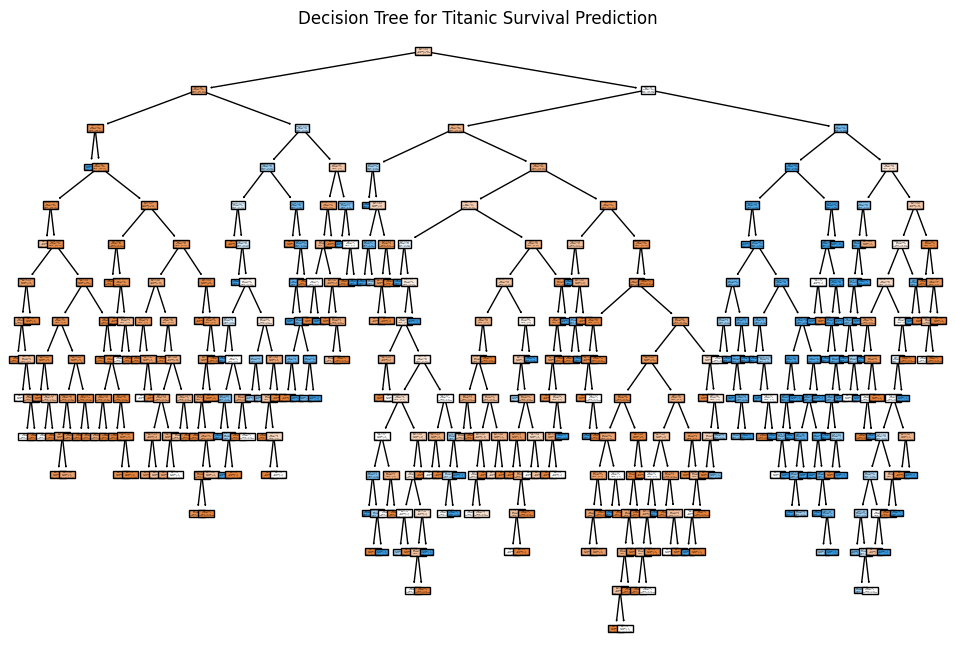

In [189]:
 # Decision Tree  fine tuning

decision_tree = DecisionTreeClassifier(max_features=4, random_state=572)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns,
          class_names=["Not Survived", "Survived"])
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()

In [190]:
#Decision Tree with 5 fold Cross Validation
decision_tree = DecisionTreeClassifier(max_features=4, random_state=572)
scores = cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring="accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [0.78212291 0.7752809  0.79775281 0.74157303 0.7752809 ]
Mean: 0.7744021090954742


In [191]:
# Random Forest with 5 fold Cross Validation

random_forest = RandomForestClassifier( max_features=4, random_state=572)
scores = cross_val_score(random_forest, X_train, Y_train, cv=5, scoring="accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [0.79329609 0.76966292 0.82022472 0.74719101 0.75280899]
Mean: 0.7766367459669826
